In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:05<00:00, 202MB/s]
100% 1.06G/1.06G [00:05<00:00, 198MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#genrators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# normalized
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(68,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 68)      19652     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 68)      272       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 117ms/step - loss: 1.2381 - accuracy: 0.5961 - val_loss: 0.6201 - val_accuracy: 0.6796
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5555 - accuracy: 0.7133 - val_loss: 0.5103 - val_accuracy: 0.7522
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5288 - accuracy: 0.7518 - val_loss: 0.4587 - val_accuracy: 0.7910
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4268 - accuracy: 0.8047 - val_loss: 0.4819 - val_accuracy: 0.7704
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3655 - accuracy: 0.8392 - val_loss: 0.5718 - val_accuracy: 0.7536
Epoch 6/10
625/625 [==============================] - 71s 113ms/step - loss: 0.3041 - accuracy: 0.8672 - val_loss: 0.9555 - val_accuracy: 0.7032
Epoch 7/10
625/625 [==============================] - 70s 112ms/step - loss: 0.2364 - accuracy: 0.9021 - val_loss: 0.5021 - val_ac

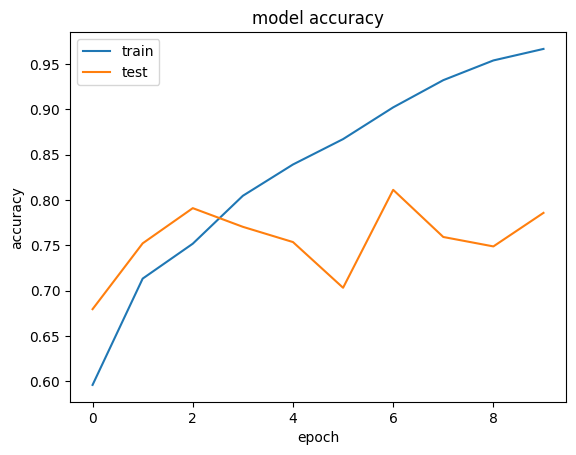

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [12]:
import cv2

In [15]:
test_img = cv2.imread('/content/Cat.jpeg')

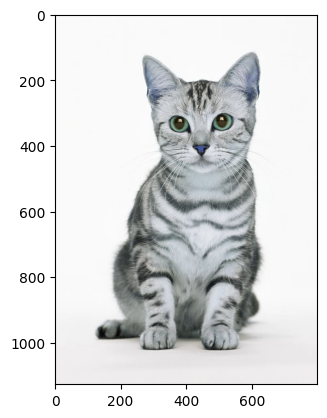

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(1127, 800, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 436ms/step


array([[0.]], dtype=float32)